<a href="https://colab.research.google.com/github/anaapbernardo/Bootcamp_DataScience/blob/main/Challenges_Bootcamp_Data_Science_Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Continuing the data analysis of hospital expenses (SUS) since 2008 

Source: https://datasus.saude.gov.br/informacoes-de-saude-tabnet/

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from io import StringIO
from datetime import date

In [ ]:
# Float values format
pd.options.display.float_format = '{:.2f}'.format

# **From Module 01:**

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv',
                    encoding='ISO-8859-1', 
                    skiprows = 3, sep=';', skipfooter=12,
                    thousands='.', decimal=',')
dados.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


In [ ]:
# Use means to select only columns with numeric values
colunas_usaveis = dados.mean().index.tolist()

# Add the column 'Unidade da Federação'
colunas_usaveis.insert(0, 'Unidade da Federação')

In [ ]:
# Create new data frame with selected columns
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161

In [ ]:
# Set index 'Unidade da Federação'
usaveis = usaveis.set_index('Unidade da Federação')
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

In [ ]:
# Sort data frame based on total values
ordenado_por_total = usaveis.sort_values('Total', ascending=False)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,38929353900.57
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,19160106499.88
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,13786964617.27
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,510646

In [ ]:
# Remove 'Total' column
ordenado_por_total = ordenado_por_total.drop('Total', axis=1)

In [ ]:
# Remove columns of 2007

colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]

In [ ]:
ordenado_por_total.columns

Index(['2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul',
       '2008/Ago', '2008/Set', '2008/Out', '2008/Nov',
       ...
       '2019/Out', '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar',
       '2020/Abr', '2020/Mai', '2020/Jun', '2020/Jul'],
      dtype='object', length=150)

In [ ]:
# Most recent expenses
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2020/Jul'

In [ ]:
# Table visualization

gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente

Unidade da Federação
35 São Paulo             282709570.31
31 Minas Gerais          120467187.34
41 Paraná                 80320852.69
43 Rio Grande do Sul      78929703.81
33 Rio de Janeiro         71540227.33
29 Bahia                  58898100.40
26 Pernambuco             62325444.34
42 Santa Catarina         51764534.76
23 Ceará                  30809221.22
52 Goiás                  33499284.38
15 Pará                   27618727.51
21 Maranhão               24374205.15
32 Espírito Santo         27460475.47
24 Rio Grande do Norte    19593057.45
25 Paraíba                15491469.06
53 Distrito Federal       22233542.26
50 Mato Grosso do Sul     12508717.35
22 Piauí                  18019214.49
27 Alagoas                13087850.40
51 Mato Grosso            13083151.70
13 Amazonas               13358514.02
28 Sergipe                 3312766.32
17 Tocantins               4489665.87
11 Rondônia                7407388.24
12 Acre                    1163813.08
14 Roraima                 27

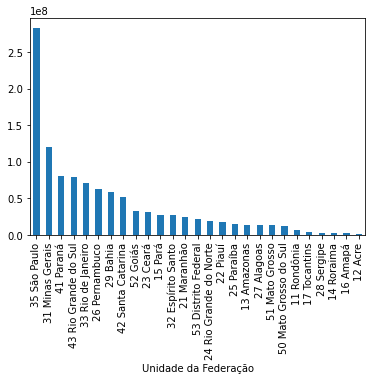

In [ ]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente.plot(kind='bar')

# **Module 2: Data Visualization**

## 1. External sources, cleaning, and manipulating data

### 1.1. Use of alternatives sources of data

Continuing the analysis started in Module 1:
- Evaluate the proportion of hospital expenses per state by the total expenses in the country

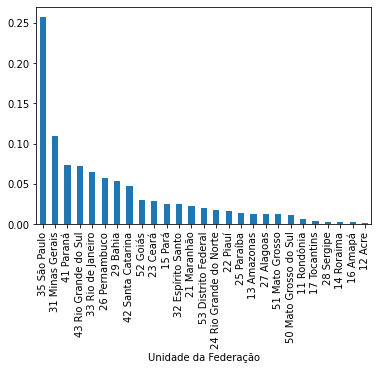

In [ ]:
gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()
gastos_proporcionais.plot(kind='bar')

The same tendency as previous graph was obtained, but now it is regarding to percentage of hospital expenses by state.

Next step is to obtain the proportion by the state population.

In [ ]:
# 1st option: Data direct from IBGE (excel)
ibge_estimativa = pd.read_excel('https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls')
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,nan,POPULAÇÃO ESTIMADA
1,Brasil,nan,211755692
2,Região Norte,nan,18672591
3,Rondônia,nan,1796460
4,Acre,nan,894470


In [ ]:
# 2nd option: Data from wikipedia (string)
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

# fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o#cite_note-IBGE_POP-1

In [ ]:
# Turn string into a data frame
dados_da_populacao_io = StringIO(dados_da_populacao)

pd.read_csv(dados_da_populacao_io, sep='\t')

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
6,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
7,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
8,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
9,9,Pará Pará,8 690 745,"4,1%",Áustria (8 602 112)


#### Challenge 01: Read the data direct from Wikipedia

In [ ]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o#cite_note-IBGE_POP-1'
df_wikipedia = pd.read_html(url, thousands=' ')[0]
df_wikipedia.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46289333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21292666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17366189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14930634,"7,1%",Chade (14 037 000)
4,5,Paraná,11516840,"5,4%",Bolívia (11 410 651)


#### Challenge 02: Create a new data frame
- Select only columns 'Unidade Federativa' and 'População'
- Rename the columns to 'uf' and 'populacao'
- Turn 'uf' into index

In [ ]:
# New data frame
df_popIBGE = pd.DataFrame()
df_popIBGE[['uf', 'populacao']] = df_wikipedia[['Unidade federativa', 'População']]

# Set index
df_popIBGE = df_popIBGE.set_index('uf')

df_popIBGE

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840
Rio Grande do Sul,11422973
Pernambuco,9616621
Ceará,9187103
Pará,8690745


In [ ]:
df_popIBGE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, São Paulo to Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


### 1.2. Manipulate and join tables

In [ ]:
dados_da_populacao_io = StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep='\t', thousands=' ')
populacao = populacao.dropna()
populacao['populacao'] = populacao['População'].astype(int)
populacao['uf'] = populacao['Unidade federativa']
populacao = populacao[['populacao', 'uf']].set_index('uf')
display(populacao.head())
display(populacao.info())

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


None

In [ ]:
populacao.index

Index([' São Paulo', ' Minas Gerais', ' Rio de Janeiro', 'Bahia Bahia',
       ' Paraná', ' Rio Grande do Sul', ' Pernambuco', ' Ceará', 'Pará Pará',
       ' Santa Catarina', ' Maranhão', ' Goiás', ' Amazonas',
       ' Espírito Santo', ' Paraíba', ' Rio Grande do Norte', ' Mato Grosso',
       ' Alagoas', ' Piauí', ' Distrito Federal', ' Mato Grosso do Sul',
       ' Sergipe', ' Rondônia', ' Tocantins', ' Acre', ' Amapá', ' Roraima'],
      dtype='object', name='uf')

In [ ]:
# Remove space from index of 'populacao'

populacao.index = populacao.index.str.strip()
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará Pará',
       'Santa Catarina', 'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo',
       'Paraíba', 'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [ ]:
# Remove number and space from index of 'gastos_do_mais recente''

gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
gastos_do_mais_recente.head()

Unidade da Federação
São Paulo           282709570.31
Minas Gerais        120467187.34
Paraná               80320852.69
Rio Grande do Sul    78929703.81
Rio de Janeiro       71540227.33
Name: 2020/Jul, dtype: float64

Few states has the name repeated in the data frame 'populacao' (Bahia and Pará).

Creating a for-loop to change the repeated name.

In [ ]:
for estado in gastos_do_mais_recente.index:
  populacao.index = populacao.index.str.replace(f'{estado} {estado}', estado)
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [ ]:
gastos_e_populacao_recente = populacao.join(gastos_do_mais_recente)
gastos_e_populacao_recente

,populacao,2020/Jul
uf,,
São Paulo,46289333,282709570.31
Minas Gerais,21292666,120467187.34
Rio de Janeiro,17366189,71540227.33
Bahia,14930634,58898100.40
Paraná,11516840,80320852.69
Rio Grande do Sul,11422973,78929703.81
Pernambuco,9616621,62325444.34
Ceará,9187103,30809221.22
Pará,8690745,27618727.51


#### Challenge 03: Structure a function for reading and cleaning this table, returning the population table and the joined table

In [ ]:
def limpa_dfPop_une_com_dfGastosRecentes(dados_da_populacao, gastos_do_mais_recente):
  
  dados_da_populacao_io = StringIO(dados_da_populacao)

  # Read table and drop nan values
  populacao = pd.read_csv(dados_da_populacao_io, sep='\t', thousands=' ').dropna()
  
  # Rename columns
  populacao['populacao'] = populacao['População'].astype(int)
  populacao['uf'] = populacao['Unidade federativa']

  # Select columns, set 'uf' as index and remove spaces
  populacao = populacao[['populacao', 'uf']].set_index('uf')
  populacao.index = populacao.index.str.strip()

  for estado in gastos_do_mais_recente.index:
    populacao.index = populacao.index.str.replace(f'{estado} {estado}', estado)
    df_pop_gastos_recente = populacao.join(gastos_do_mais_recente)

  return populacao, df_pop_gastos_recente

In [ ]:
populacao, df_pop_gastos_recente = limpa_dfPop_une_com_dfGastosRecentes(dados_da_populacao, gastos_do_mais_recente)
populacao

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840
Rio Grande do Sul,11422973
Pernambuco,9616621
Ceará,9187103
Pará,8690745


In [ ]:
df_pop_gastos_recente

,populacao,2020/Jul
uf,,
São Paulo,46289333,282709570.31
Minas Gerais,21292666,120467187.34
Rio de Janeiro,17366189,71540227.33
Bahia,14930634,58898100.40
Paraná,11516840,80320852.69
Rio Grande do Sul,11422973,78929703.81
Pernambuco,9616621,62325444.34
Ceará,9187103,30809221.22
Pará,8690745,27618727.51


## 2. Proportionalities and Seaborn

### 2.1. Visualizations, seaborn and proportionalities

Continuing the analysis from topic 1:

- Plot and analyze different graphs of population and hospital expenses from the most recent month.
- Start to use seaborn.

In [ ]:
gastos_e_populacao_recente.head()

,populacao,2020/Jul
uf,,
São Paulo,46289333,282709570.31
Minas Gerais,21292666,120467187.34
Rio de Janeiro,17366189,71540227.33
Bahia,14930634,58898100.40
Paraná,11516840,80320852.69


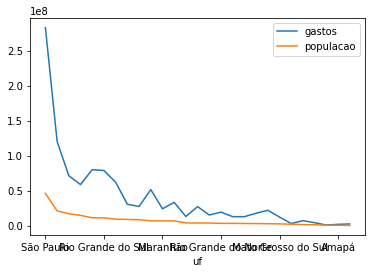

In [ ]:
# Terrible data visualization
gastos_e_populacao_recente['gastos'] = gastos_e_populacao_recente['2020/Jul']
gastos_e_populacao_recente[['gastos', 'populacao']].plot()

In [ ]:
gastos_e_populacao_recente.loc[['Rio Grande do Sul', 'São Paulo']]

,populacao,2020/Jul,gastos
uf,,,
Rio Grande do Sul,11422973,78929703.81,78929703.81
São Paulo,46289333,282709570.31,282709570.31


In [ ]:
# RS - Hospital expenses / inhabitants 

78929703.81 / 11422973

6.909733902899009

In [ ]:
# SP - Hospital expenses / inhabitants

282709570.31 / 46289333

6.107445322446102

Observing at the graph it looks like that SP has much more hospital expenses than RS. However, doing the calculation, it is clear that RS has a higher hospital expense per inhabitants than SP. Thus, this specific line plot can make information confusing.

In [ ]:
gastos_e_populacao_recente['gasto_por_habitante'] = gastos_e_populacao_recente['gastos'] / gastos_e_populacao_recente['populacao']
gastos_e_populacao_recente.head()

,populacao,2020/Jul,gastos,gasto_por_habitante
uf,,,,
São Paulo,46289333,282709570.31,282709570.31,6.11
Minas Gerais,21292666,120467187.34,120467187.34,5.66
Rio de Janeiro,17366189,71540227.33,71540227.33,4.12
Bahia,14930634,58898100.40,58898100.40,3.94
Paraná,11516840,80320852.69,80320852.69,6.97


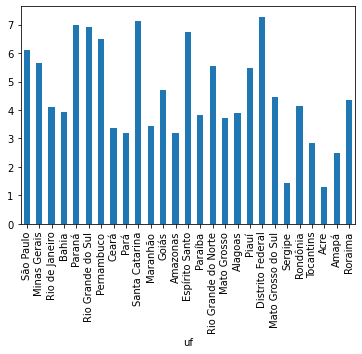

In [ ]:
gastos_e_populacao_recente['gasto_por_habitante'].plot(kind='bar')

The graph above shows the hospital expenses per inhabitant in each state.

The data used in this plot was sorted by the state population, so the x-axis is from the biggest state to the smaller one in terms of population.

#### Challenge 01: Sort the data frame based on hospital expenses and create a descending graph of hospital expenses per inhabitants in each state.

In [ ]:
ordenado_por_gasto_recente = gastos_e_populacao_recente.sort_values('gastos', ascending=False)
ordenado_por_gasto_recente.head()

,populacao,2020/Jul,gastos,gasto_por_habitante
uf,,,,
São Paulo,46289333,282709570.31,282709570.31,6.11
Minas Gerais,21292666,120467187.34,120467187.34,5.66
Paraná,11516840,80320852.69,80320852.69,6.97
Rio Grande do Sul,11422973,78929703.81,78929703.81,6.91
Rio de Janeiro,17366189,71540227.33,71540227.33,4.12


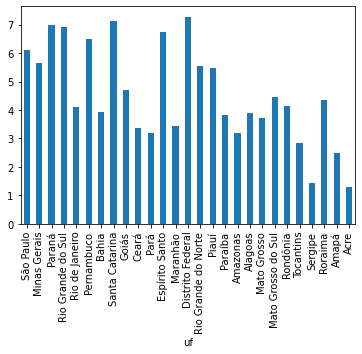

In [ ]:
ordenado_por_gasto_recente['gasto_por_habitante'].plot(kind='bar')

Comparing the graph above (sorted by hospital expenses) with the previous graph (sorted by population), it is possible to observe that there are changes in the order of the states. However, from both graphs it is clear that not necessarily states with larger population have highest hospital expenses.

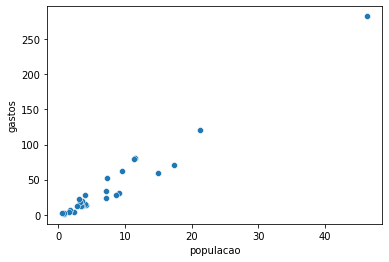

In [ ]:
sns.scatterplot(data=gastos_e_populacao_recente / 1000000, x='populacao', y='gastos')

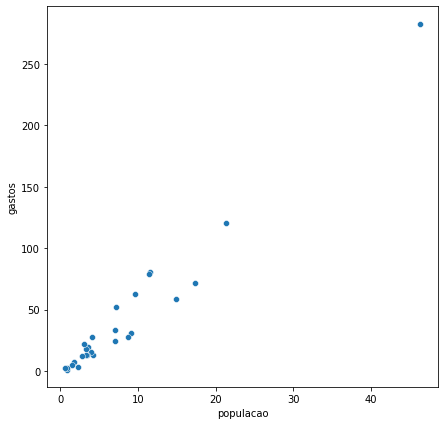

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente / 1000000, x='populacao', y='gastos')

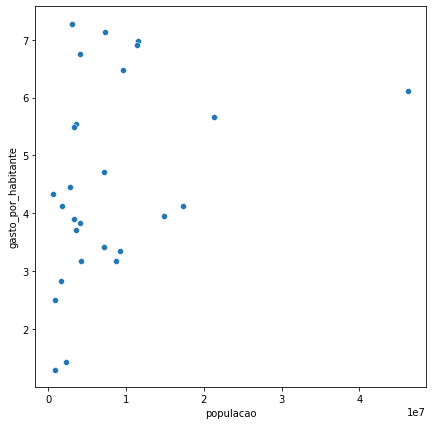

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente, x='populacao', y='gasto_por_habitante')

#### Challenge 02: Plot these last two graph using the data from the previous month.

- Remove numbers and space from index of data frame 'ordenado_por_total'
- Join the column of previous month ('2020/Jun') to data frame 'gastos_e_populacao_recente'
- Plot the graph using the values of hospital expenses from 2020/Jun

In [ ]:
# Clean and set index of 'ordenado_por_total'

if ordenado_por_total.index.str[:2][0].isnumeric():
  ordenado_por_total.index = ordenado_por_total.index.str[3:]

ordenado_por_total.index

Index(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Bahia', 'Pernambuco', 'Santa Catarina', 'Ceará',
       'Goiás', 'Pará', 'Maranhão', 'Espírito Santo', 'Rio Grande do Norte',
       'Paraíba', 'Distrito Federal', 'Mato Grosso do Sul', 'Piauí', 'Alagoas',
       'Mato Grosso', 'Amazonas', 'Sergipe', 'Tocantins', 'Rondônia', 'Acre',
       'Roraima', 'Amapá'],
      dtype='object', name='Unidade da Federação')

In [ ]:
# Unindo os data frames
gastos_e_populacao_recente = gastos_e_populacao_recente.join(ordenado_por_total['2020/Jun'])

In [ ]:
gastos_e_populacao_recente = gastos_e_populacao_recente[['populacao', '2020/Jun', '2020/Jul', 'gastos', 'gasto_por_habitante']]
gastos_e_populacao_recente.head()

,populacao,2020/Jun,2020/Jul,gastos,gasto_por_habitante
uf,,,,,
São Paulo,46289333,299060851.62,282709570.31,282709570.31,6.11
Minas Gerais,21292666,135977571.87,120467187.34,120467187.34,5.66
Rio de Janeiro,17366189,77604925.21,71540227.33,71540227.33,4.12
Bahia,14930634,65159300.63,58898100.40,58898100.40,3.94
Paraná,11516840,92901461.36,80320852.69,80320852.69,6.97


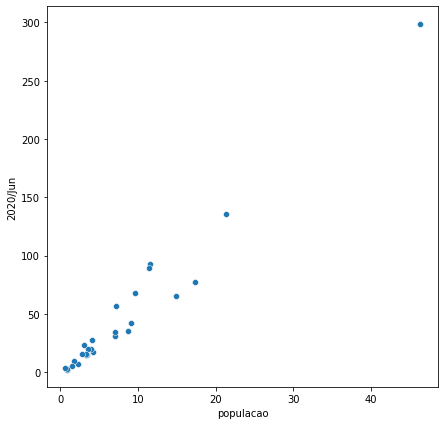

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente / 1000000, x='populacao', y='2020/Jun')

This graph using the data from Jun/2020 appears to have a similar tendency to the one plotted using data from Jul/2020.

In [ ]:
# Hospital expenses per inhabitant in 2020/Jun

gastos_e_populacao_recente['gasto_por_habitante_jun'] = gastos_e_populacao_recente['2020/Jun'] / gastos_e_populacao_recente['populacao']
gastos_e_populacao_recente.head()

,populacao,2020/Jun,2020/Jul,gastos,gasto_por_habitante,gasto_por_habitante_jun
uf,,,,,,
São Paulo,46289333,299060851.62,282709570.31,282709570.31,6.11,6.46
Minas Gerais,21292666,135977571.87,120467187.34,120467187.34,5.66,6.39
Rio de Janeiro,17366189,77604925.21,71540227.33,71540227.33,4.12,4.47
Bahia,14930634,65159300.63,58898100.40,58898100.40,3.94,4.36
Paraná,11516840,92901461.36,80320852.69,80320852.69,6.97,8.07


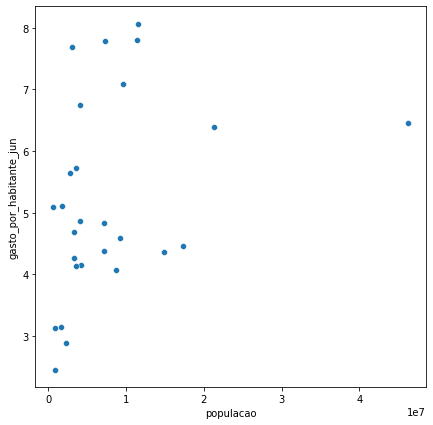

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente, x='populacao', y='gasto_por_habitante_jun')

The graph above, just like the previous graph that used data from Jul/2020, doesn't show any specific trend. The data is quite spread out.

#### Challenge 03: Plot the last graphs using the data of hospital expenses from the last two months, separated by colors.

In [ ]:
gastos_e_populacao_JunJul = gastos_e_populacao_recente[['populacao', '2020/Jun', '2020/Jul']] / 1000000
gastos_e_populacao_JunJul.head()

,populacao,2020/Jun,2020/Jul
uf,,,
São Paulo,46.29,299.06,282.71
Minas Gerais,21.29,135.98,120.47
Rio de Janeiro,17.37,77.60,71.54
Bahia,14.93,65.16,58.90
Paraná,11.52,92.90,80.32


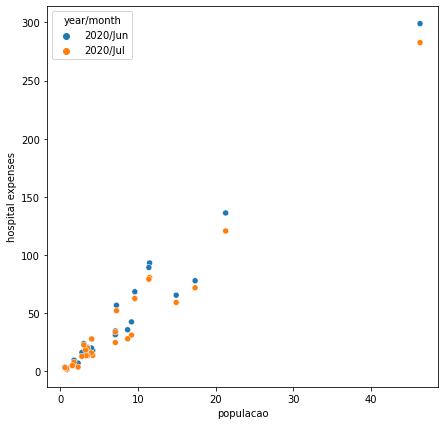

In [ ]:
# The following function unpivots a data frame to make it more computer-friendly
df_JunJul = gastos_e_populacao_JunJul.melt('populacao', var_name='year/month',  value_name='hospital expenses')

plt.figure(figsize=(7,7))
sns.scatterplot(x='populacao', y='hospital expenses', hue='year/month', data=df_JunJul)

plt.show()

Here it is possible to observer the similar tendency in the months of June and July.

In [ ]:
gastos_e_populacao_JunJul_hab = gastos_e_populacao_recente[['populacao', 'gasto_por_habitante', 'gasto_por_habitante_jun']]
gastos_e_populacao_JunJul_hab.head()

,populacao,gasto_por_habitante,gasto_por_habitante_jun
uf,,,
São Paulo,46289333,6.11,6.46
Minas Gerais,21292666,5.66,6.39
Rio de Janeiro,17366189,4.12,4.47
Bahia,14930634,3.94,4.36
Paraná,11516840,6.97,8.07


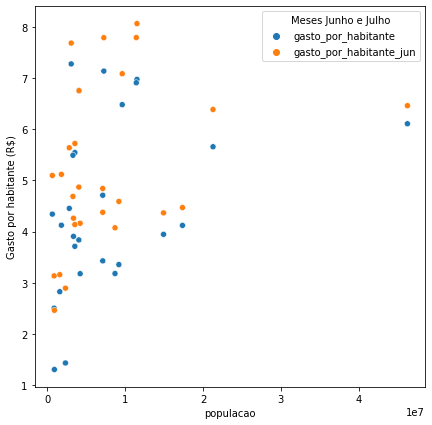

In [ ]:
df_JunJul_hab = gastos_e_populacao_JunJul_hab.melt('populacao', var_name='Meses Junho e Julho',  value_name='Gasto por habitante (R$)')

plt.figure(figsize=(7,7))
sns.scatterplot(x='populacao', y='Gasto por habitante (R$)', hue='Meses Junho e Julho', data=df_JunJul_hab)

plt.show()

Even evaluating two months (June and July) it was not find any correlation among hospital expenses and state population.

### 2.2. Solving the Challenge 3

To solve challenge 3 it was necessary to add more columns in the data frame. So, instead of add new columns every time, it is easier to create a function to do it.

In [ ]:
# Function to insert columns in a data frame

def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos: pd.DataFrame, df: pd.DataFrame, mes: str):
  gastos_do_mes = todos_os_gastos[mes]
  df[f"gastos_{mes}"] = gastos_do_mes
  df[f"gasto_por_habitante_{mes}"] = df[f"gastos_{mes}"] / df["populacao"]

First, I will remove the columns that I had added in the data frame 'gastos_e_populacao_recente' in the challenge 3, so I can work with a clean data frame and use the function defined above.

In [ ]:
gastos_e_populacao_recente = gastos_e_populacao_recente.drop(['2020/Jun', '2020/Jul', 'gastos', 'gasto_por_habitante', 'gasto_por_habitante_jun'], axis=1)
gastos_e_populacao_recente.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [ ]:
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, "2020/Mai")
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, "2020/Jun")
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, "2020/Jul")
gastos_e_populacao_recente.head()

,populacao,gastos_2020/Mai,gasto_por_habitante_2020/Mai,gastos_2020/Jun,gasto_por_habitante_2020/Jun,gastos_2020/Jul,gasto_por_habitante_2020/Jul
uf,,,,,,,
São Paulo,46289333,302857660.98,6.54,299060851.62,6.46,282709570.31,6.11
Minas Gerais,21292666,136867275.75,6.43,135977571.87,6.39,120467187.34,5.66
Rio de Janeiro,17366189,86281033.16,4.97,77604925.21,4.47,71540227.33,4.12
Bahia,14930634,61756775.71,4.14,65159300.63,4.36,58898100.40,3.94
Paraná,11516840,106103737.62,9.21,92901461.36,8.07,80320852.69,6.97


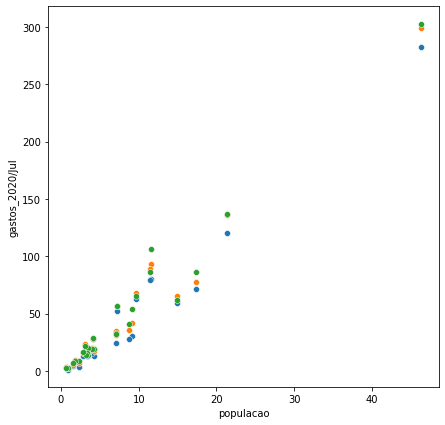

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente / 1000000, x="populacao", y="gastos_2020/Jul")
sns.scatterplot(data=gastos_e_populacao_recente / 1000000, x="populacao", y="gastos_2020/Jun")
sns.scatterplot(data=gastos_e_populacao_recente / 1000000, x="populacao", y="gastos_2020/Mai")

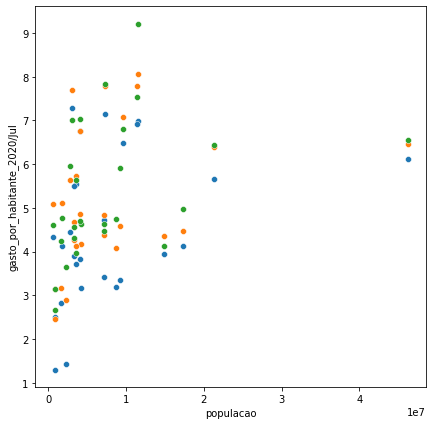

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente, x="populacao", y="gasto_por_habitante_2020/Jul")
sns.scatterplot(data=gastos_e_populacao_recente, x="populacao", y="gasto_por_habitante_2020/Jun")
sns.scatterplot(data=gastos_e_populacao_recente, x="populacao", y="gasto_por_habitante_2020/Mai")

#### Challenge 04: Analyze the graphs and try to come up with hypotheses that explain what you are understanding of the data. Remember that the conclusion is a hypothesis, and that data will change over time.

Looking at the 1st graph of hospital expenses by the state's population, it is possible to notice a trend of the larger the population, the greater the expenditures. Comparing only these three months (May, June, and July), it even seems that the expenses are similar, however, I believe that if we evaluate longer periods, it will be possible to notice seasonalities, for example, higher hospital expenses during vacation months.

When we analyze the data of hospital expenses per inhabitant, it is noted that there is no pattern. That is, not necessarily the most populous state will have the highest hospital expenses per inhabitant. Therefore, it is possible to conclude that the funds are not distributed equally, and there are probably other factors that influence the distribution and use of hospital funds by SUS.

## 3. Ticks, scales and image formatting

### 3.1. Formatting ticks and scales

In [ ]:
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,5

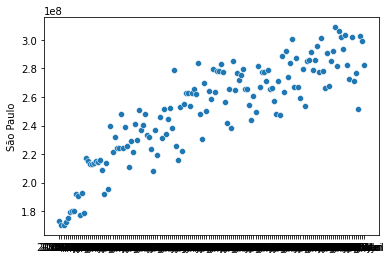

In [ ]:
sns.scatterplot(x=ordenado_por_total.columns, y=ordenado_por_total.loc["São Paulo"])

Transpose of the data frame will make it easier to plot the graphs.

In [ ]:
mensal = ordenado_por_total.T
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172834914.73,70301089.50,48855046.46,45897704.82,44122593.19,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008/Mar,170481849.56,79119005.51,55611791.07,52928695.92,42892665.52,41301703.40,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008/Abr,170278285.95,79046322.41,56115135.82,51972416.77,45295962.86,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008/Mai,172402180.59,79268070.12,55574831.93,51679350.79,43951349.46,42071294.17,31409553.23,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008/Jun,175416595.83,79608652.53,56094754.74,53759674.01,44102925.77,39910042.40,28947510.92,28993292.76,29463965.11,20332533.92,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10288668.11,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


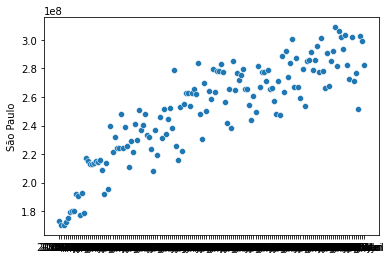

In [ ]:
sns.scatterplot(data=mensal, x=mensal.index, y="São Paulo")

#### Challenge 01: Plot the same graph using another state

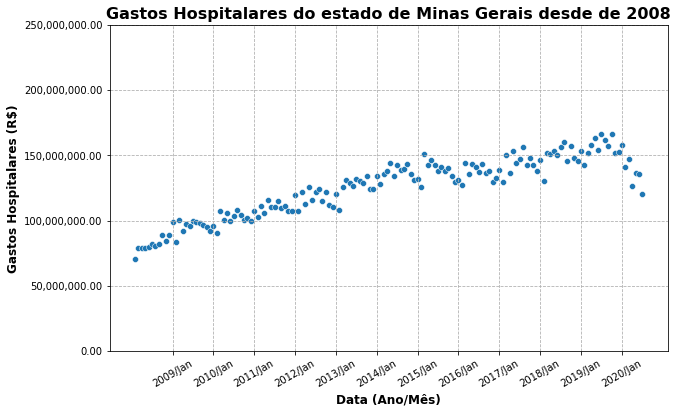

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=mensal, x=mensal.index, y='Minas Gerais')

# Parameters for x-label
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
plt.xticks(rotation=30)
plt.xlabel('Data (Ano/Mês)', fontsize=12, fontweight='bold')

# Parameters for y-label
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.ylim(0, 250000000)
plt.ylabel('Gastos Hospitalares (R$)', fontsize=12, fontweight='bold')

# Other parameters
plt.title('Gastos Hospitalares do estado de Minas Gerais desde de 2008', fontsize=16, fontweight='bold')
plt.grid(linestyle="--")

plt.show()

#### Challenge 02: Format the y-axis using StrMethodFormatter. Place title, labels, and change their font size.

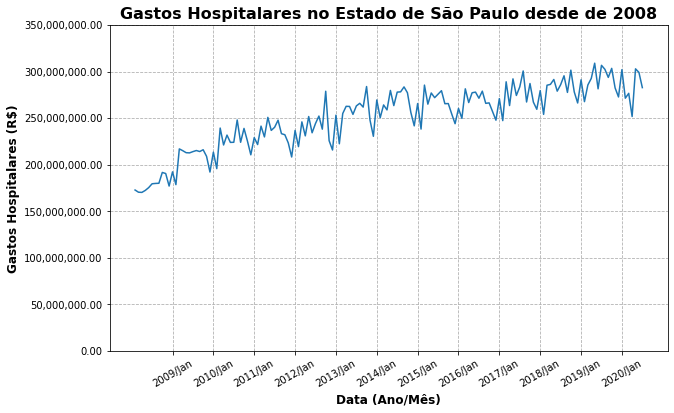

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")

# Parameters for x-label
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
plt.xticks(rotation=30)
plt.xlabel('Data (Ano/Mês)', fontsize=12, fontweight='bold')

# Parameters for y-label
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.ylim(0, 350000000)
plt.ylabel('Gastos Hospitalares (R$)', fontsize=12, fontweight='bold')

# Other parameters
plt.title('Gastos Hospitalares no Estado de São Paulo desde de 2008', fontsize=16, fontweight='bold')
plt.grid(linestyle="--")

plt.show()

## 4. Working with datetime module and melt function

### 4.1. DateTime

In [ ]:
# Dictionary used to convert the str 'month' to int
meses = {
    "Jan" : 1,
    "Fev" : 2,
    "Mar" : 3,
    "Abr" : 4,
    "Mai" : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Ago" : 8,
    "Set" : 9,
    "Out" : 10,
    "Nov" : 11,
    "Dez" : 12
}

# Function to change the index str to a date (YYYY/MM/DD)
def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero: int = meses[mes]
  return date(ano, mes_numero, 1)

mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172834914.73,70301089.50,48855046.46,45897704.82,44122593.19,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008-03-01,170481849.56,79119005.51,55611791.07,52928695.92,42892665.52,41301703.40,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008-04-01,170278285.95,79046322.41,56115135.82,51972416.77,45295962.86,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008-05-01,172402180.59,79268070.12,55574831.93,51679350.79,43951349.46,42071294.17,31409553.23,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008-06-01,175416595.83,79608652.53,56094754.74,53759674.01,44102925.77,39910042.40,28947510.92,28993292.76,29463965.11,20332533.92,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10288668.11,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


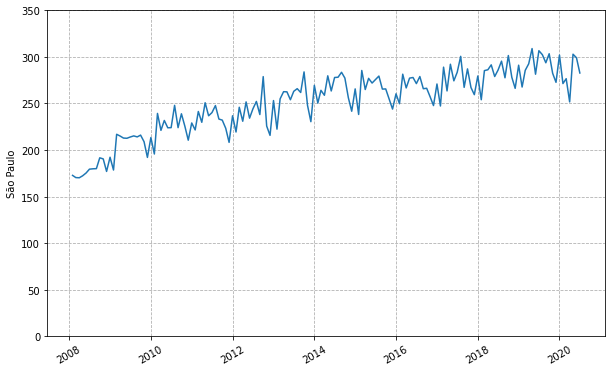

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal/1000000, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
plt.ylim(0, 350)
plt.grid(linestyle="--")
plt.show()

In [ ]:
mensal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 2008-02-01 to 2020-07-01
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   São Paulo            150 non-null    float64
 1   Minas Gerais         150 non-null    float64
 2   Paraná               150 non-null    float64
 3   Rio Grande do Sul    150 non-null    float64
 4   Rio de Janeiro       150 non-null    float64
 5   Bahia                150 non-null    float64
 6   Pernambuco           150 non-null    float64
 7   Santa Catarina       150 non-null    float64
 8   Ceará                150 non-null    float64
 9   Goiás                150 non-null    float64
 10  Pará                 150 non-null    float64
 11  Maranhão             150 non-null    float64
 12  Espírito Santo       150 non-null    float64
 13  Rio Grande do Norte  150 non-null    float64
 14  Paraíba              150 non-null    float64
 15  Distrito Federal     150 non-

In [ ]:
mensal.index[0]

datetime.date(2008, 2, 1)

### 4.2. Manipulating data using melt function

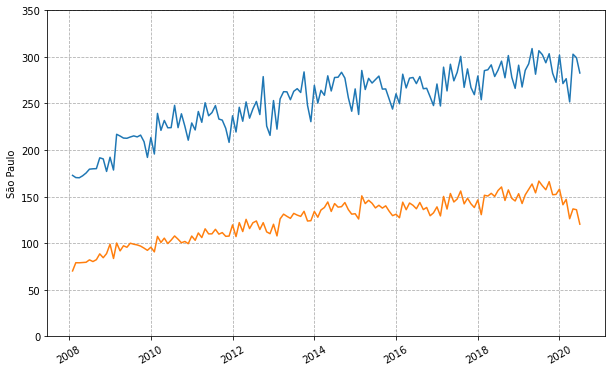

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal/1000000, x=mensal.index, y="São Paulo")
ax = sns.lineplot(data=mensal/1000000, x=mensal.index, y="Minas Gerais")
plt.xticks(rotation=30)
plt.ylim(0, 350)
plt.grid(linestyle="--")
plt.show()

# problemas:
# 1. eixos
# 2. legenda
# 3. serio mesmo? copy e paste das linhas do grafico?

In [ ]:
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172834914.73,70301089.50,48855046.46,45897704.82,44122593.19,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008-03-01,170481849.56,79119005.51,55611791.07,52928695.92,42892665.52,41301703.40,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008-04-01,170278285.95,79046322.41,56115135.82,51972416.77,45295962.86,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008-05-01,172402180.59,79268070.12,55574831.93,51679350.79,43951349.46,42071294.17,31409553.23,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008-06-01,175416595.83,79608652.53,56094754.74,53759674.01,44102925.77,39910042.40,28947510.92,28993292.76,29463965.11,20332533.92,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10288668.11,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


In [ ]:
mensal_aberto = mensal.reset_index().melt(id_vars=["index"], value_vars=mensal.columns)
mensal_aberto.columns = ["mes", "uf", "gasto"]
mensal_aberto.head()

,mes,uf,gasto
0,2008-02-01,São Paulo,172834914.73
1,2008-03-01,São Paulo,170481849.56
2,2008-04-01,São Paulo,170278285.95
3,2008-05-01,São Paulo,172402180.59
4,2008-06-01,São Paulo,175416595.83


#### Challenge 01: Go back from 'mensal_aberto' to 'mensal'

In [ ]:
mensal_novo = mensal_aberto.pivot_table(values='gasto', index='mes', columns='uf')
mensal_novo.head()

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
mes,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1743978.66,8112220.30,1275063.72,7934652.10,33410124.06,27643304.86,10215956.80,10032886.43,18149374.27,13452263.93,7929894.93,8279288.79,70301089.50,48855046.46,10871589.62,20126081.01,26222079.10,9711680.20,9110108.87,45897704.82,44122593.19,1940792.63,771687.83,24409572.92,4636850.76,172834914.73,5051932.07
2008-03-01,2057439.02,9210505.56,1177745.93,8641517.13,41301703.40,30085370.22,11627918.26,12262049.08,20992213.03,14750895.33,9416367.68,9793888.78,79119005.51,55611791.07,12348758.14,22149375.82,30716361.81,10428191.09,10126626.54,52928695.92,42892665.52,1955721.68,876091.18,27483480.50,5017838.07,170481849.56,5200151.87
2008-04-01,2057829.69,10466691.94,1396371.51,8531576.49,42826993.62,31376221.00,11922015.36,12453466.98,21049477.30,15148647.11,9390588.03,8997542.75,79046322.41,56115135.82,12680965.13,23436682.75,30589332.79,10227943.00,10964234.85,51972416.77,45295962.86,2143353.81,896952.53,27806641.44,5265951.03,170278285.95,5343714.73
2008-05-01,2226577.93,9844096.03,1411520.77,9079902.15,42071294.17,31189904.62,11900817.00,11789786.09,19162546.79,14543679.92,9378197.25,9842108.59,79268070.12,55574831.93,13258411.71,23861080.80,31409553.23,10562148.66,11032871.23,51679350.79,43951349.46,2280382.58,1027288.73,28354279.52,5367094.94,172402180.59,5344487.99
2008-06-01,2112576.82,10288668.11,1420892.01,8646295.77,39910042.40,29463965.11,11969271.76,11889687.35,20332533.92,14553978.06,9450300.60,10257782.00,79608652.53,56094754.74,12246686.33,23502915.90,28947510.92,10465088.93,10450599.08,53759674.01,44102925.77,2624542.97,938293.54,28993292.76,4981036.36,175416595.83,5398413.09


#### Challenge 02: Improve the graph visualization:

- Choose only a few states.
- Change the color palette.
- Position the legend more appropriately.
- Add title and labels on the x and y axes.

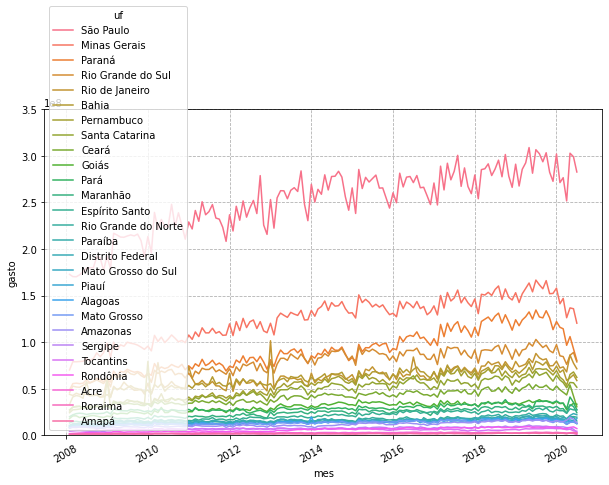

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x="mes", y="gasto", hue="uf")
plt.xticks(rotation=30)
plt.ylim(0, 350000000)
plt.grid(linestyle="--")
plt.show()

In [ ]:
mensal_sudeste = mensal[['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Espírito Santo']]
mensal_sudeste.head()

Unidade da Federação,São Paulo,Minas Gerais,Rio de Janeiro,Espírito Santo
2008-02-01,172834914.73,70301089.50,44122593.19,10032886.43
2008-03-01,170481849.56,79119005.51,42892665.52,12262049.08
2008-04-01,170278285.95,79046322.41,45295962.86,12453466.98
2008-05-01,172402180.59,79268070.12,43951349.46,11789786.09
2008-06-01,175416595.83,79608652.53,44102925.77,11889687.35


In [ ]:
mensal_sudeste_aberto = mensal_sudeste.reset_index().melt(id_vars=["index"], value_vars=mensal_sudeste.columns)
mensal_sudeste_aberto.columns = ["mes", "uf", "gasto"]
mensal_sudeste_aberto.head()

,mes,uf,gasto
0,2008-02-01,São Paulo,172834914.73
1,2008-03-01,São Paulo,170481849.56
2,2008-04-01,São Paulo,170278285.95
3,2008-05-01,São Paulo,172402180.59
4,2008-06-01,São Paulo,175416595.83


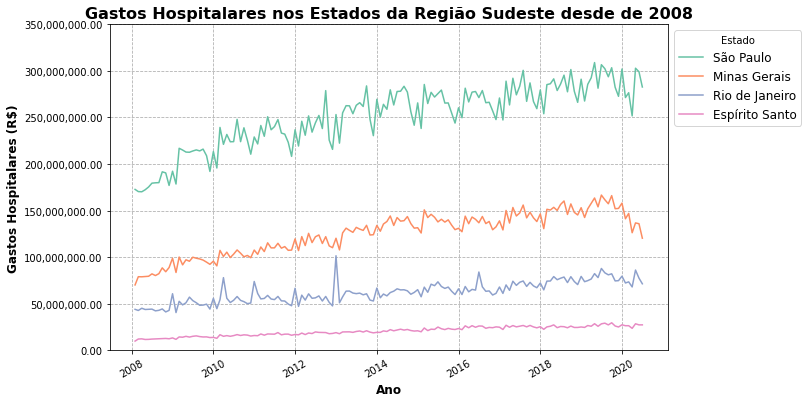

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_sudeste_aberto, x="mes", y="gasto", hue="uf", palette='Set2')

# Parameters for x-label
plt.xticks(rotation=30)
plt.xlabel('Ano', fontsize=12, fontweight='bold')

# Parameters for y-label
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.ylim(0, 350000000)
plt.ylabel('Gastos Hospitalares (R$)', fontsize=12, fontweight='bold')

# Other parameters
plt.title('Gastos Hospitalares nos Estados da Região Sudeste desde de 2008', fontsize=16, fontweight='bold')
plt.legend(title='Estado', fontsize=12, loc='upper right',  bbox_to_anchor=(1.25, 1))
plt.grid(linestyle="--")

plt.show()

## 5. Manipulating dates and creating new analysis

### 5.1. Comparing hospital expenses year by year

In [ ]:
# Set a more descriptive name to the column
mensal_aberto = mensal_aberto.rename(columns={'mes': 'ano_mes_dia'})
mensal_aberto.head()

,ano_mes_dia,uf,gasto
0,2008-02-01,São Paulo,172834914.73
1,2008-03-01,São Paulo,170481849.56
2,2008-04-01,São Paulo,170278285.95
3,2008-05-01,São Paulo,172402180.59
4,2008-06-01,São Paulo,175416595.83


In [ ]:
mensal_aberto['ano_mes_dia'] = mensal_aberto['ano_mes_dia'].astype('datetime64')

In [ ]:
mensal_aberto['mes'] = mensal_aberto['ano_mes_dia'].dt.month
mensal_aberto['ano'] = mensal_aberto['ano_mes_dia'].dt.year
mensal_aberto.head()

,ano_mes_dia,uf,gasto,mes,ano
0,2008-02-01,São Paulo,172834914.73,2,2008
1,2008-03-01,São Paulo,170481849.56,3,2008
2,2008-04-01,São Paulo,170278285.95,4,2008
3,2008-05-01,São Paulo,172402180.59,5,2008
4,2008-06-01,São Paulo,175416595.83,6,2008


In [ ]:
# Selecting only São Paulo
mensal_aberto.query("uf=='São Paulo'")

,ano_mes_dia,uf,gasto,mes,ano
0,2008-02-01,São Paulo,172834914.73,2,2008
1,2008-03-01,São Paulo,170481849.56,3,2008
2,2008-04-01,São Paulo,170278285.95,4,2008
3,2008-05-01,São Paulo,172402180.59,5,2008
4,2008-06-01,São Paulo,175416595.83,6,2008
...,...,...,...,...,...
145,2020-03-01,São Paulo,276606288.92,3,2020
146,2020-04-01,São Paulo,251696362.66,4,2020
147,2020-05-01,São Paulo,302857660.98,5,2020
148,2020-06-01,São Paulo,299060851.62,6,2020


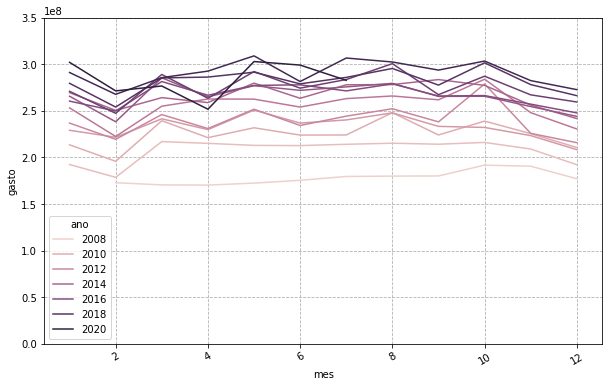

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"), x='mes', y='gasto', hue='ano')
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.ylim(0, 350000000)
plt.show()

#### Challenge 01: Improve graph visualization
- Change color palette
- Add title
- Ticks with the months 'name'
- Improve labels

In [ ]:
nome_do_mes = {
    1 : 'Janeiro',
    2 : 'Fevereiro',
    3 : 'Março',
    4 : 'Abril',
    5 : 'Maio',
    6 : 'Junho',
    7 : 'Julho',
    8 : 'Agosto',
    9 : 'Setembro',
    10 : 'Outubro',
    11 : 'Novembro',
    12 : 'Dezembro'
}

mensal_aberto['nome_do_mes'] = mensal_aberto['mes'].map(nome_do_mes)

In [ ]:
mensal_aberto.head()

,ano_mes_dia,uf,gasto,mes,ano,nome_do_mes
0,2008-02-01,São Paulo,172834914.73,2,2008,Fevereiro
1,2008-03-01,São Paulo,170481849.56,3,2008,Março
2,2008-04-01,São Paulo,170278285.95,4,2008,Abril
3,2008-05-01,São Paulo,172402180.59,5,2008,Maio
4,2008-06-01,São Paulo,175416595.83,6,2008,Junho


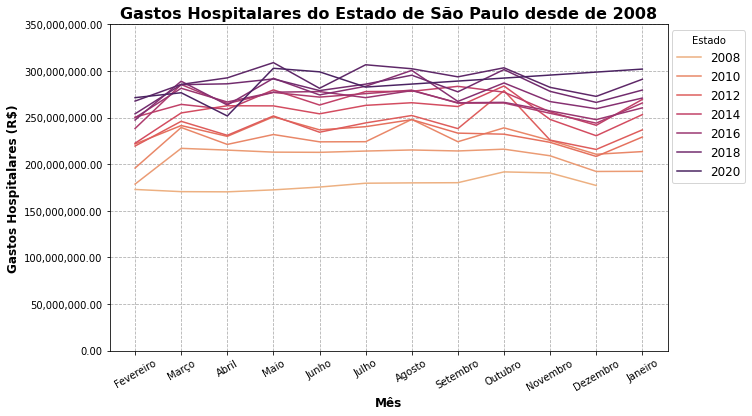

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"), x='nome_do_mes', y='gasto', hue='ano', palette='flare')

# Parameters for x-label
plt.xticks(rotation=30)
plt.xlabel('Mês', fontsize=12, fontweight='bold')

# Parameters for y-label
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.ylim(0, 350000000)
plt.ylabel('Gastos Hospitalares (R$)', fontsize=12, fontweight='bold')

# Other parameters
plt.title('Gastos Hospitalares do Estado de São Paulo desde de 2008', fontsize=16, fontweight='bold')
plt.legend(title='Estado', fontsize=12, loc='upper right',  bbox_to_anchor=(1.15, 1))
plt.grid(linestyle="--")

plt.show()

#### Challenge 02: Plot other graphs, separated and together, with two states that have different climates, and evaluate the differences.

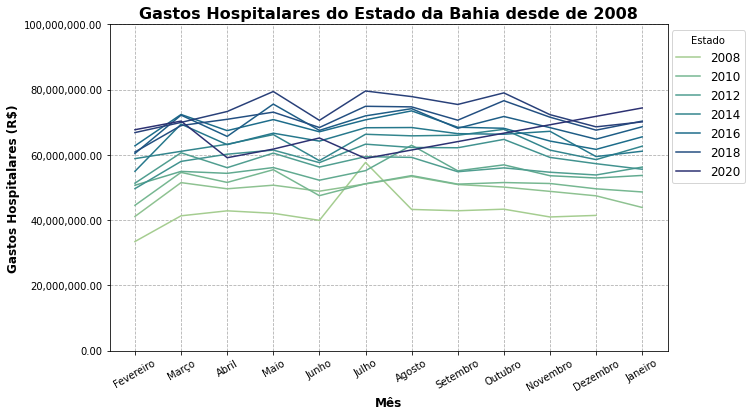

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='Bahia'"), x='nome_do_mes', y='gasto', hue='ano', palette='crest')

# Parameters for x-label
plt.xticks(rotation=30)
plt.xlabel('Mês', fontsize=12, fontweight='bold')

# Parameters for y-label
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.ylim(0, 100000000)
plt.ylabel('Gastos Hospitalares (R$)', fontsize=12, fontweight='bold')

# Other parameters
plt.title('Gastos Hospitalares do Estado da Bahia desde de 2008', fontsize=16, fontweight='bold')
plt.legend(title='Estado', fontsize=12, loc='upper right',  bbox_to_anchor=(1.15, 1))
plt.grid(linestyle="--")

plt.show()

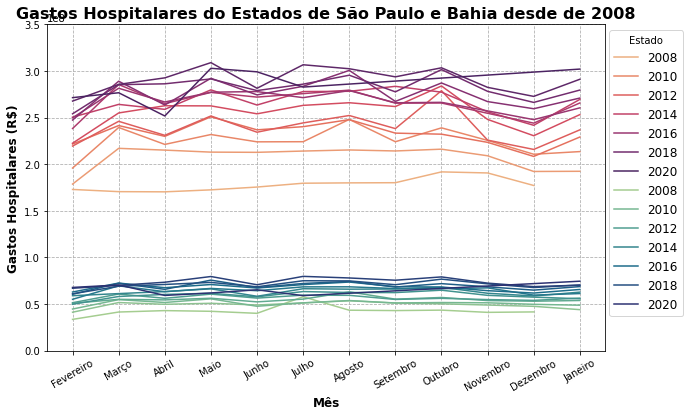

In [ ]:
plt.figure(figsize=(10,6))

ax_sp = sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"), x='nome_do_mes', y='gasto', hue='ano', palette='flare')
ax_ba = sns.lineplot(data=mensal_aberto.query("uf=='Bahia'"), x='nome_do_mes', y='gasto', hue='ano', palette='crest')

# Parameters for x-label
plt.xticks(rotation=30)
plt.xlabel('Mês', fontsize=12, fontweight='bold')

# Parameters for y-label
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.ylim(0, 350000000)
plt.ylabel('Gastos Hospitalares (R$)', fontsize=12, fontweight='bold')

# Other parameters
plt.title('Gastos Hospitalares do Estados de São Paulo e Bahia desde de 2008', fontsize=16, fontweight='bold')
plt.legend(title='Estado', fontsize=12, loc='upper right',  bbox_to_anchor=(1.15, 1))
plt.grid(linestyle="--")

plt.show()

### 5.2. Another way to evaluate the hospital expenses

In [ ]:
# Dictionary expressing the numbers of days for each month
dias_por_mes = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

In [ ]:
mensal_aberto['nro_dias'] = mensal_aberto['mes'].map(dias_por_mes)
mensal_aberto['gasto_diario'] = mensal_aberto['gasto'] / mensal_aberto['nro_dias']
mensal_aberto = mensal_aberto[['ano_mes_dia', 'uf', 'gasto', 'ano', 'mes', 'nome_do_mes', 'nro_dias', 'gasto_diario']]

mensal_aberto.head()

,ano_mes_dia,uf,gasto,ano,mes,nome_do_mes,nro_dias,gasto_diario
0,2008-02-01,São Paulo,172834914.73,2008,2,Fevereiro,28,6172675.53
1,2008-03-01,São Paulo,170481849.56,2008,3,Março,31,5499414.50
2,2008-04-01,São Paulo,170278285.95,2008,4,Abril,30,5675942.86
3,2008-05-01,São Paulo,172402180.59,2008,5,Maio,31,5561360.66
4,2008-06-01,São Paulo,175416595.83,2008,6,Junho,30,5847219.86


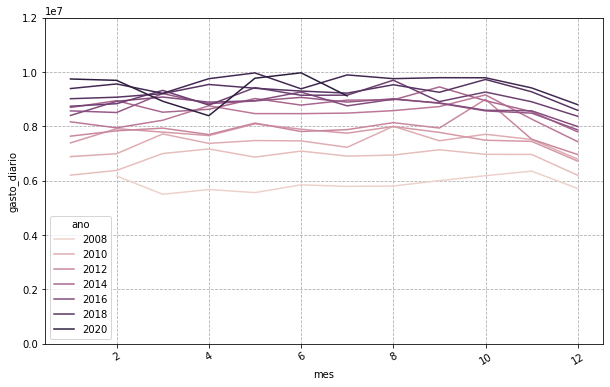

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"), x="mes", y="gasto_diario", hue="ano")
plt.xticks(rotation=30)
plt.ylim(0, 12000000)
plt.grid(linestyle="--")
plt.show()

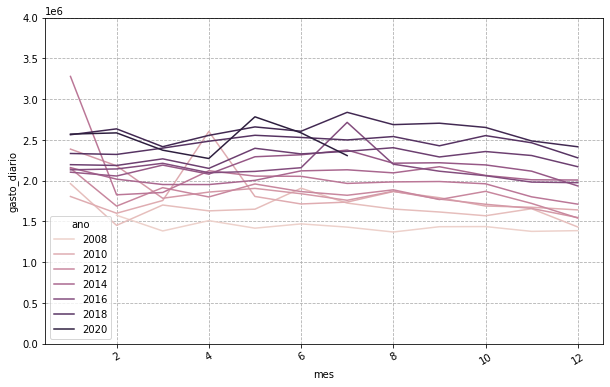

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='Rio de Janeiro'"), x="mes", y="gasto_diario", hue="ano")
plt.xticks(rotation=30)
plt.ylim(0, 4000000)
plt.grid(linestyle="--")
plt.show()

## 6. Grouping data and analyzing by category

### 6.1. Advancing on pandas and seaborn

In [ ]:
estado_a_analisar = mensal_aberto.query("uf=='São Paulo'")
estado_a_analisar.head()

,ano_mes_dia,uf,gasto,ano,mes,nome_do_mes,nro_dias,gasto_diario
0,2008-02-01,São Paulo,172834914.73,2008,2,Fevereiro,28,6172675.53
1,2008-03-01,São Paulo,170481849.56,2008,3,Março,31,5499414.50
2,2008-04-01,São Paulo,170278285.95,2008,4,Abril,30,5675942.86
3,2008-05-01,São Paulo,172402180.59,2008,5,Maio,31,5561360.66
4,2008-06-01,São Paulo,175416595.83,2008,6,Junho,30,5847219.86


In [ ]:
gastos_por_ano = estado_a_analisar.groupby("ano").sum()
gastos_por_ano.head()

,gasto,mes,nro_dias,gasto_diario
ano,,,,
2008,1960230442.26,77,334,64600828.91
2009,2489030484.83,78,365,81823449.01
2010,2696622949.86,78,365,88626495.26
2011,2794549339.77,78,365,91905424.14
2012,2873973262.98,78,365,94466122.27


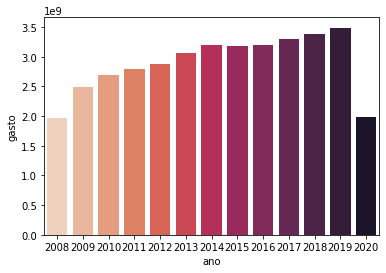

In [ ]:
sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto", palette=sns.color_palette("rocket_r", 13))

#### Challenge 01. Set the color palette by the value (lightest to darkest)

### 6.2. Evaluating more than one state

In [ ]:
estados = ["São Paulo", "Minas Gerais", "Pernambuco"]
por_ano_dos_estados = mensal_aberto.query("uf in @estados").groupby(["uf","ano"]).sum().reset_index()
por_ano_dos_estados.head()

,uf,ano,gasto,mes,nro_dias,gasto_diario
0,Minas Gerais,2008,894346731.42,77,334,29442915.97
1,Minas Gerais,2009,1149141349.15,78,365,37767441.61
2,Minas Gerais,2010,1217493124.37,78,365,40025073.84
3,Minas Gerais,2011,1315021864.36,78,365,43242529.34
4,Minas Gerais,2012,1408354148.98,78,365,46290727.60


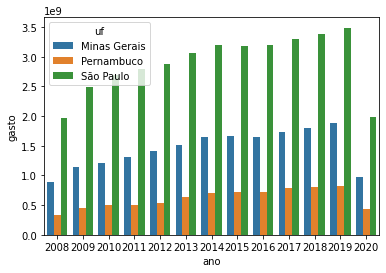

In [ ]:
sns.barplot(data=por_ano_dos_estados, x="ano", y="gasto", hue="uf")

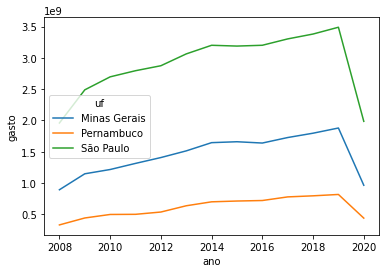

In [ ]:
sns.lineplot(data=por_ano_dos_estados, x="ano", y="gasto", hue="uf")

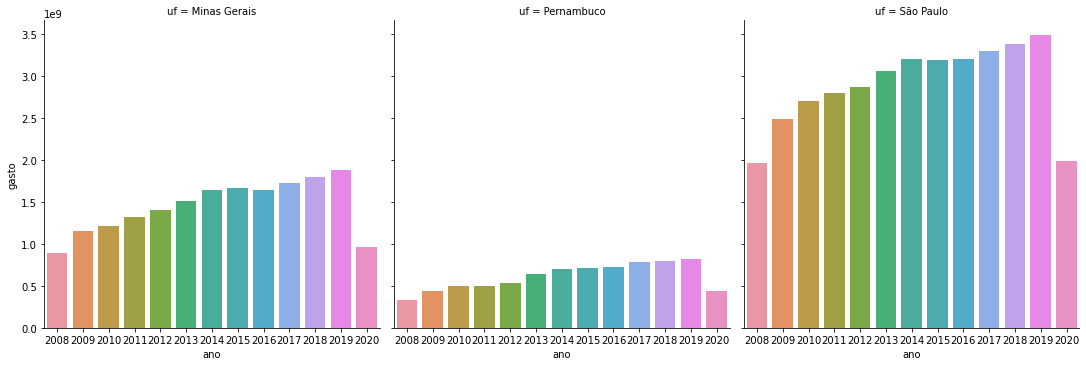

In [ ]:
sns.catplot(data=por_ano_dos_estados, y="gasto", x="ano", kind="bar", col="uf")

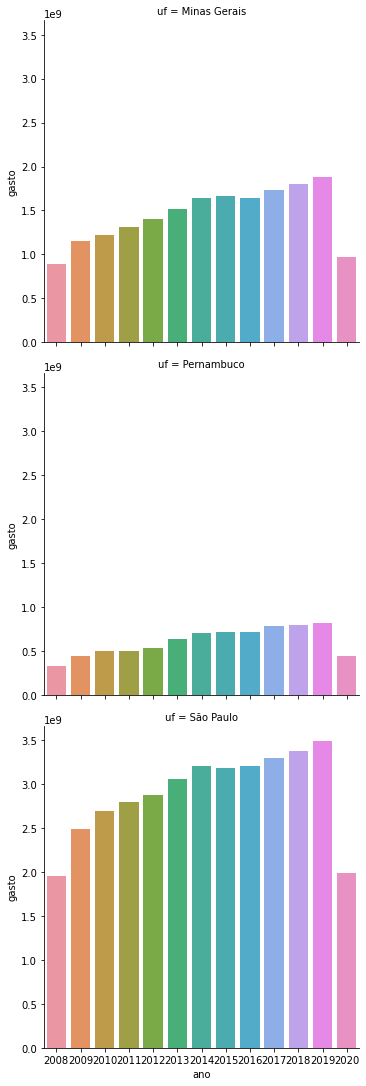

In [ ]:
sns.catplot(data=por_ano_dos_estados, y="gasto", x="ano", kind="bar", row="uf")

#### Challenge 02: Explore the seaborn and matplotlib documentation (API).

#### Challenge 03. Challenge: Create new graphs.

#### Challenge 04: Download another dateset from the tabnet and run your analysis there